In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_excel('student.csv.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
Math       1000 non-null int64
Reading    1000 non-null int64
Writing    1000 non-null int64
dtypes: int64(3)
memory usage: 23.5 KB


In [3]:
df.head()

,Math,Reading,Writing
0,48,68,63
1,62,81,72
2,79,80,78
3,76,83,79
4,59,64,62


In [4]:
X=df['Math'].values
Y=df['Reading'].values
Z=df['Writing'].values
n=len(X)

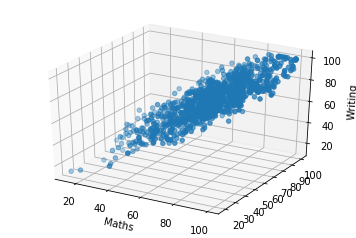

In [5]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X,Y,Z,marker='o')
ax.set_xlabel('Maths')
ax.set_label('Reading')
ax.set_zlabel('Writing')
plt.show()

In [6]:
att=2
lenX=len(X)
X0=np.ones((lenX,1))

In [7]:
X=df.iloc[:,:2].values
X.shape

(1000, 2)

In [8]:
Y=df.iloc[:,-1].values.reshape(1000,1)
Y.shape

(1000, 1)

In [9]:
X=np.concatenate((X0,X),axis=1)
X.shape

(1000, 3)

In [10]:
alpha=0.00001

In [11]:
theta=np.random.rand(df.shape[1]).reshape(1,df.shape[1])

theta.shape


(1, 3)

In [12]:
Y_pred=np.dot(X,theta.T)
Y_pred.shape

(1000, 1)

In [13]:
for i in range(1000):
    Y_pred=np.dot(X,theta.T)
    Y_diff=Y-Y_pred
    
    derv=-2*(np.dot((Y_diff.T),X))/lenX
    theta=theta-alpha*derv
    Y_square=np.square(Y_diff)
    cost=(np.sum(Y_square))/(lenX)
theta.shape

(1, 3)

In [14]:
cost

21.21935745210838

In [15]:
theta

array([[0.65868102, 0.12497475, 0.85336247]])

# Sklearn

In [16]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

regr = sklearn.linear_model.LinearRegression()
lr=LinearRegression()
new_X=X[:,1:]

lr.fit(new_X,Y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
lr.intercept_

array([-1.46243738])

In [18]:
lr.coef_

array([[0.09600221, 0.91049989]])

In [19]:
print(mean_squared_error(Y, Y_pred))

21.21935745210838
